In [30]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from scipy import interp
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR,SVC 
import seaborn as sns

In [2]:
data = pd.read_csv("Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data["Gender"].replace(["Male","Female"],[0,1],inplace=True)
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [5]:
# Seperate x and y

x=data.iloc[:,1:4]
y =data.Purchased

In [6]:
# Split the data into training (80%) and test (20%)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state = 100)

In [7]:
# Data Preprocessing: Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [8]:
# Define SVM models with different kernel techniques
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']
models = {}

linear
linear Prediction = [0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1
 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0
 0 0 0 0 0 0]
linear MSE = 0.175
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.96      0.87        49
           1       0.90      0.61      0.73        31

    accuracy                           0.82        80
   macro avg       0.85      0.79      0.80        80
weighted avg       0.84      0.82      0.82        80



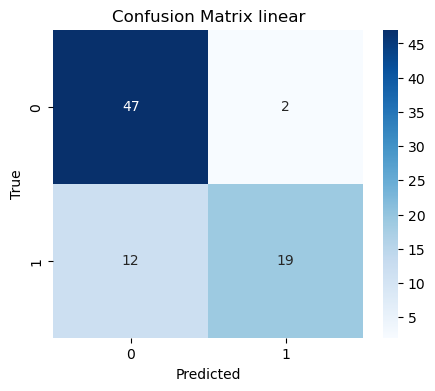

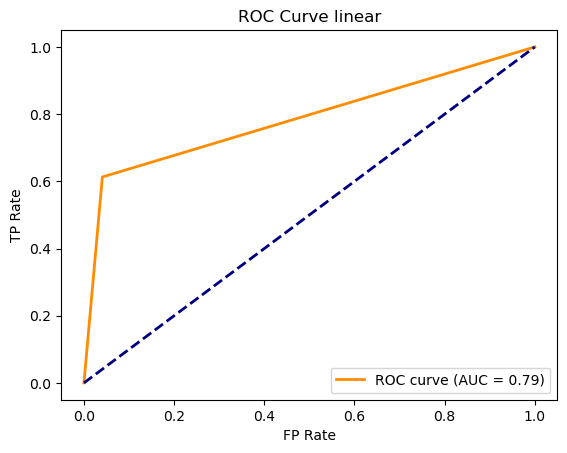

poly
poly Prediction = [0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1
 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0
 0 0 0 0 0 0]
poly MSE = 0.1375
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90        49
           1       0.92      0.71      0.80        31

    accuracy                           0.86        80
   macro avg       0.88      0.83      0.85        80
weighted avg       0.87      0.86      0.86        80



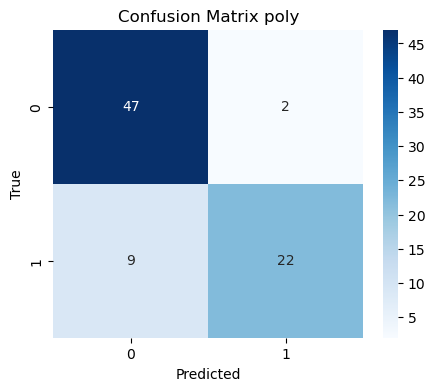

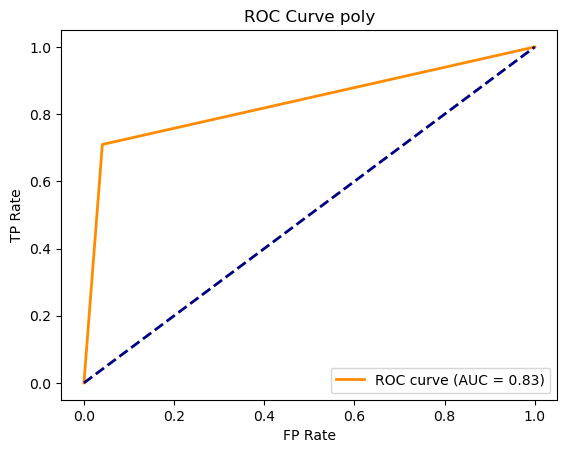

rbf
rbf Prediction = [0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1
 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0
 0 0 0 0 0 0]
rbf MSE = 0.1
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        49
           1       0.90      0.84      0.87        31

    accuracy                           0.90        80
   macro avg       0.90      0.89      0.89        80
weighted avg       0.90      0.90      0.90        80



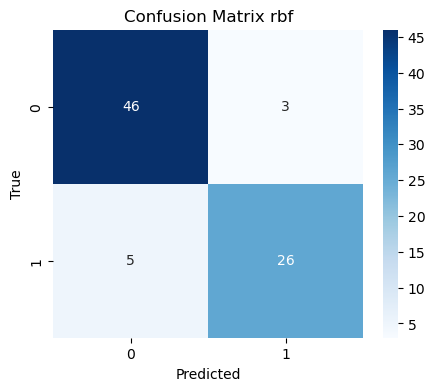

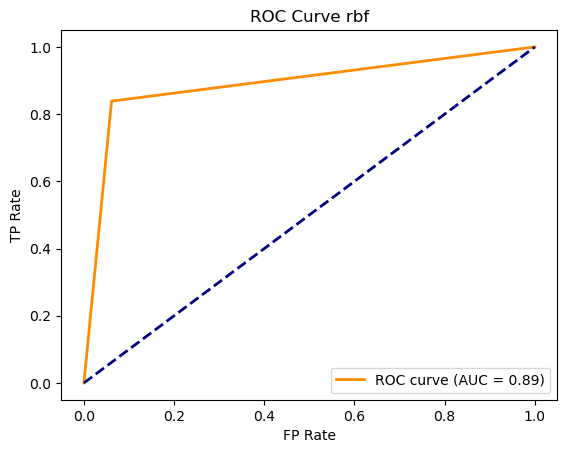

sigmoid
sigmoid Prediction = [0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0
 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0
 0 0 0 0 0 0]
sigmoid MSE = 0.2
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        49
           1       0.83      0.61      0.70        31

    accuracy                           0.80        80
   macro avg       0.81      0.77      0.78        80
weighted avg       0.80      0.80      0.79        80



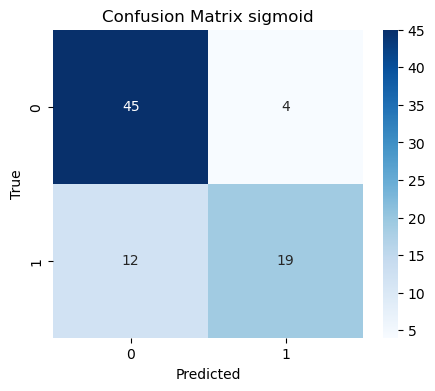

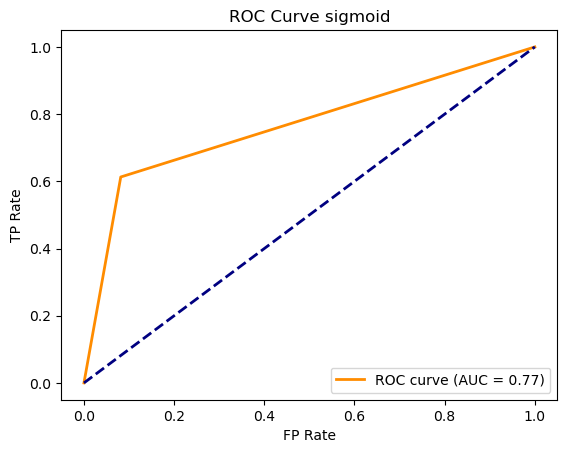

In [36]:
for kernel in kernel_list:
    # modelling
    print(kernel)
    model = SVC(kernel=kernel)
    model.fit(x_train, y_train)
    
    #prediction
    y_pred = model.predict(x_test)
    print(f"{kernel} Prediction =",y_pred)
    
    #accuracy = accuracy_score(y_test, y_pred)
    #print(accuracy)
    
    # MSE
    mse = mean_squared_error(y_test, y_pred)
    print(f"{kernel} MSE =", mse)

    # Classification report
    rp = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(rp)
    
    # Confusion Matrix
    cf = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cf, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix {kernel}')
    plt.show()
    
    # ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    # Calculate the AUC (Area Under the Curve)
    auc = roc_auc_score(y_test, y_pred)
    # Create the ROC curve plot
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('FP Rate')
    plt.ylabel('TP Rate')
    plt.title(f'ROC Curve {kernel}')
    plt.legend(loc='lower right')
    plt.show()